In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from DataDefinitionFunctions import Functions
from LinearRegression import LinearRegression

# Testing Univariate Linear Regression

## Test 1
In this first test, the model is tasked with learning a very simple relation: $2x=y$.
For univariate linear regression, the hypothesis function is $y =\theta_0 + \theta_1x$.
Ideally the model sets $(\theta_0, \theta_1) = (0,2)$.

#### Data and Training


In [9]:
# Data definition
X = np.random.uniform(size=400)
Y = Functions.double(X)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=69)

# Training
test1_model = LinearRegression()
test1_model.fit(X_train, y_train)

100%|███████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 75004.10it/s]


#### Testing

In [10]:
parameter_diff = test1_model.parameters - (0,2)
assert abs(parameter_diff).sum() <= 0.1

y_pred = test1_model.pred(X_test)

error = mean_squared_error(y_pred, y_test)
assert error <= 0.001

## Test 2
In second test, the model is tasked with learning a slightly more complex relation: $2x+1=y$.  
Ideally the model sets $(\theta_0, \theta_1) = (1,2)$.

#### Data and training

In [12]:
# Data definition
X = np.random.uniform(size=400)
Y = Functions.double_plus_one(X)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=69)

# Training
test2_model = LinearRegression()
test2_model.fit(X_train, y_train)

100%|███████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 68118.10it/s]


#### Testing

In [15]:
parameter_diff = test2_model.get_params() - (1,2)
assert abs(parameter_diff).sum() <= 0.1

y_pred = test2_model.pred(X_test)
error = mean_squared_error(y_pred, y_test)
assert error <= 0.001

## Test 3
In the third test, the model is tasked with learning a more complex relation: $-x_1 + 2x_2 =y$.
There can be different combinations of parameters that can reflect the behavior of this relation, hence, making a prediction for the value of the trained parameters is pointless. The best way to evaluate this model is to test its accuracy.

#### Data and training

In [16]:
# Data definition
X_1 = np.random.uniform(size=400)
X_2 = np.random.uniform(low=-1, high=0, size=400)
Y = Functions.negate_plus_double(X_1, X_2)
X = np.stack([X_1, X_2], axis=-1)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=69)

# Training
test3_model = LinearRegression()
test3_model.fit(X_train, y_train)

100%|███████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 65015.54it/s]


#### Testing

In [18]:
y_pred = test3_model.pred(X_test)
error = mean_squared_error(y_pred, y_test)
assert error <= 0.001

## Test 4
As the tests above show, the model performs well on relatively simple relations in the data. It will now be tested against an actual data set.

#### Data and training

In [19]:
X, Y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=69)

In [20]:
# Training
test4_model = LinearRegression()
test4_model.fit(X_train, y_train)

100%|███████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 53537.02it/s]


#### Testing

In [21]:
y_pred = test4_model.pred(X_test)
my_error = mean_squared_error(y_pred, y_test)

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
sklearn_error = mean_squared_error(y_pred, y_test)

In [23]:
print(f"""The error of my model is {round(my_error)} and the error of the sklearn linear regression model is {round(sklearn_error)}. Quite close!""")

The error of my model is 2639 and the error of the sklearn linear regression model is 2502. Quite close!


The chart below shows the second feature plotted against the target label. In black is the actual value and in blue is the prediction made by my model. The relation is captured reasonably well.

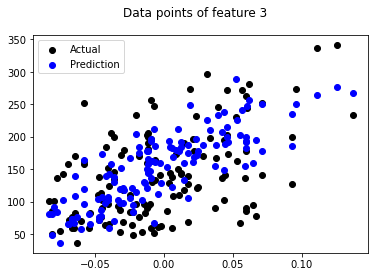

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
fig.suptitle("Data points of feature 3")
ax1.scatter(X_test[:,2], y_test, color="black", label="Actual")
ax1.scatter(X_test[:,2], y_pred, color="blue", label="Prediction")
plt.legend(loc='upper left');
plt.show()